## 准备数据

In [1]:
import numpy as np

def true_function(x):
    return np.sin(x) + 0.1 * np.random.normal(size=x.shape)
    # return np.exp(-(x - 0.1)**2 / (2 * 0.1**2)) / (0.1 * np.sqrt(2 * np.pi))    

class TwoLayerReLUModel:
    def __init__(self, input_size, hidden_units, output_size):
        self.W1 = np.random.randn(input_size, hidden_units)
        self.b1 = np.zeros((1, hidden_units))
        self.W2 = np.random.randn(hidden_units, output_size)
        self.b2 = np.zeros((1, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, x):
        self.x = x
        self.h1 = self.relu(np.dot(x, self.W1) + self.b1)
        self.output = np.dot(self.h1, self.W2) + self.b2
        return self.output

    def backward(self, grad_y, learning_rate):
        grad_output = grad_y
        grad_W2 = np.dot(self.h1.T, grad_output)
        grad_b2 = np.sum(grad_output, axis=0, keepdims=True)
        grad_h1 = np.dot(grad_output, self.W2.T)
        grad_h1[self.h1 <= 0] = 0
        grad_W1 = np.dot(self.x.T, grad_h1)
        grad_b1 = np.sum(grad_h1, axis=0, keepdims=True)

        # 参数更新
        self.W2 -= learning_rate * grad_W2
        self.b2 -= learning_rate * grad_b2
        self.W1 -= learning_rate * grad_W1
        self.b1 -= learning_rate * grad_b1

In [2]:
# 创建两层ReLU网络模型实例
input_size = 1
hidden_units = 10  # 可调整隐藏层神经元数量
output_size = 1
learning_rate = 0.01

two_layer_model = TwoLayerReLUModel(input_size, hidden_units, output_size)

# 执行训练
epochs = 10000
for epoch in range(epochs):
    # 生成随机训练数据
    x_train = np.random.uniform(-2*np.pi, 2*np.pi, 100).reshape(-1, 1)
    y_train = true_function(x_train)

    # 前向传播
    predictions = two_layer_model.forward(x_train)

    # 计算损失（均方误差）
    loss = np.mean((predictions - y_train)**2)

    # 反向传播
    grad_y = 2 * (predictions - y_train) / len(y_train)
    two_layer_model.backward(grad_y, learning_rate)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")


Epoch 0, Loss: 79.09694235297597


Epoch 100, Loss: 0.3938321887723822
Epoch 200, Loss: 0.29640647859698055
Epoch 300, Loss: 0.30533971538870197
Epoch 400, Loss: 0.26704853507060733
Epoch 500, Loss: 0.22921352197640374
Epoch 600, Loss: 0.2034571335162643
Epoch 700, Loss: 0.17956743865766822
Epoch 800, Loss: 0.14081683426191371
Epoch 900, Loss: 0.15894334813696467
Epoch 1000, Loss: 0.20885151425584844
Epoch 1100, Loss: 0.15807556560119404
Epoch 1200, Loss: 0.13573740825851804
Epoch 1300, Loss: 0.16510191647868233
Epoch 1400, Loss: 0.15172016663843185
Epoch 1500, Loss: 0.15002353964909612
Epoch 1600, Loss: 0.15656945135196343
Epoch 1700, Loss: 0.1142002277440304
Epoch 1800, Loss: 0.14399677935730093
Epoch 1900, Loss: 0.16769510223427492
Epoch 2000, Loss: 0.1326135533137862
Epoch 2100, Loss: 0.14809457986924465
Epoch 2200, Loss: 0.16087468562681648
Epoch 2300, Loss: 0.12019495027506903
Epoch 2400, Loss: 0.138142473493304
Epoch 2500, Loss: 0.17221956990753415
Epoch 2600, Loss: 0.16296259875023686
Epoch 2700, Loss: 0.1912678

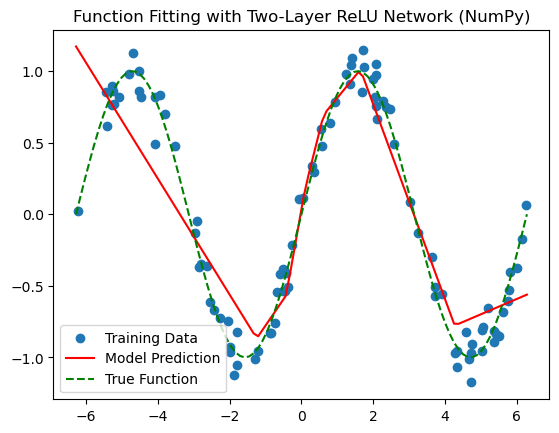

In [3]:
# 在测试集上进行预测
x_test = np.linspace(-2*np.pi, 2*np.pi, 100).reshape(-1, 1)
predictions_test = two_layer_model.forward(x_test)

# 绘制结果
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, label='Training Data')
plt.plot(x_test, predictions_test, label='Model Prediction', color='r')
plt.plot(x_test, np.sin(x_test), label='True Function', linestyle='--', color='g')
plt.legend()
plt.title('Function Fitting with Two-Layer ReLU Network (NumPy)')
plt.show()

In [3]:
for row in range(1,10):
    for col in range(1,11-row):
        print(f'{col}*{row}={col*row}',end='\t')
    print()


1*1=1	2*1=2	3*1=3	4*1=4	5*1=5	6*1=6	7*1=7	8*1=8	9*1=9	
1*2=2	2*2=4	3*2=6	4*2=8	5*2=10	6*2=12	7*2=14	8*2=16	
1*3=3	2*3=6	3*3=9	4*3=12	5*3=15	6*3=18	7*3=21	
1*4=4	2*4=8	3*4=12	4*4=16	5*4=20	6*4=24	
1*5=5	2*5=10	3*5=15	4*5=20	5*5=25	
1*6=6	2*6=12	3*6=18	4*6=24	
1*7=7	2*7=14	3*7=21	
1*8=8	2*8=16	
1*9=9	
